# Preparação de dados: séries temporais
## "De funções básicas a janelas de tempo"

## Preparação do ambiente

In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams

# Vamos usar yfinance para carregar dados de preços de ações da B3
import yfinance as yf

rcParams["xtick.labelsize"] = 15
rcParams["ytick.labelsize"] = 15
rcParams["legend.fontsize"] = "small"

warnings.filterwarnings("ignore") 

# Introdução

Séries temporais são encontradas em muitas aplicações comuns do dia-a-dia, desde séries financeiras até logs de registros de operações de usuários em bancos de dados. Este material foi inspirado pelo material de [Ben T.](https://towardsdatascience.com/every-pandas-function-you-can-should-use-to-manipulate-time-series-711cb0c5c749)

## O que abordaremos <small id='toc'></small>

#### [**1. Funções básicas de data e hora**](#1)
  * [1.1 Importando dados de séries](#1.1)
  * [1.2 Tipo de dados do Pandas ˋTimestampˋ](#1.2)
  * [1.3 Sequência de datas](#1.3)
  * [1.4 Cortes/Slicing](#1.4)

#### [**2. Dados faltantes: imputaçao e interpolaç˜ao**](#2)
  * [2.1 Imputacao via media, mediana, moda](#2.1)
  * [2.2 Preenchimento para frente e para trás](#2.2)
  * [2.3 Usando ˋpd.interpolateˋ](#2.3)
  * [2.4 Imputação com modelo usando KNN](#2.4)

#### [**3. Metricas e calculos basicos de series temporais**](#3)
  * [3.1 Deslocamentos e atrasos](#3.1)
  * [3.2 Mudanças percentuais](#3.2)

#### [**4. Reamostragem - ˋupsampleˋ  e ˋdownsampleˋ**](#4)
  * [4.1 Mudança de frequência com `asfreq`](#4.1)
  * [4.2 Downsampling com reamostragem e agregação](#4.2)
  * [4.3 Upsampling com reamostragem e interpolação](#4.3)
  * [4.4 Visualização dos dados amostrados](#4.4)

#### [**5. Comparaç˜ao do crescimento de m´ultiplas s´eries temporais**](#5)

#### [**6. Funçes de janelas**](#6)
  * [6.1 Funções de janelas deslizantes](#6.1)
  * [6.2 Funções de janela expansivas](#6.2)

#### [**7. Resumo**](#7)

## 1. Funções básicas de data e tempo

### 1.1 Importando dados de series temporais <small id='1.1'></small>

[Voltar para cima🔝](#toc)

Ao usar `pd.read_csv` para importar séries temporais, existem 2 argumentos que você deve usar - ˋparse_datesˋ e `index_col`:

In [ ]:
# Importar preços de ações da Apple e Google
#aapl_googl = pd.read_csv(
#    "https://raw.githubusercontent.com/BexTuychiev/medium_stories/master/2021/july/3_time_series_manipulation/data/apple_google.csv",
#   parse_dates=["Date"],
#   index_col="Date",
#).dropna()
petr4_vale3 = pd.read_csv("http://www.facom.ufu.br/~albertini/dados/petr_vale.csv",
                          parse_dates = ["Date"],
                          index_col = "Date")



In [ ]:
petr_vale.head()

,petr,vale
Date,,
2023-03-01 00:00:00-03:00,19.648865,84.505518
2023-03-02 00:00:00-03:00,19.834307,84.778275
2023-03-03 00:00:00-03:00,19.888391,84.928753
2023-03-06 00:00:00-03:00,20.182004,82.671518
2023-03-07 00:00:00-03:00,19.919301,82.201258


from matplotlib import pyplot as plt
_df_0['petr'].plot(kind='hist', bins=20, title='petr')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['vale'].plot(kind='hist', bins=20, title='vale')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='petr', y='vale', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['petr'].plot(kind='line', figsize=(8, 4), title='petr')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['vale'].plot(kind='line', figsize=(8, 4), title='vale')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import yfinance as yf

# Defina o ticker do Ibovespa
ticker = '^BVSP'

ibovespa = yf.Ticker(ticker)

# Obtenha o histórico de preços do Ibovespa
ibovespa_hist = ibovespa.history(period='1y', interval='1d')
ibov = ibovespa_hist["High"].rename("ibov")
# Exiba os primeiros registros dos dados
print(ibov.head())

Datetime
2024-03-01 16:45:00-03:00    129318.492188
Name: ibov, dtype: float64


In [ ]:
ibov.head()

Date
2023-03-01 00:00:00-03:00    105497.0
2023-03-02 00:00:00-03:00    104912.0
2023-03-03 00:00:00-03:00    104440.0
2023-03-06 00:00:00-03:00    105171.0
2023-03-07 00:00:00-03:00    105179.0
Name: ibov, dtype: float64

`parse_dates` converte strings de datas em objetos `DateTime` e `index_col` atribui a coluna indicada como o índice da série. Essa operação é a base de toda manipulação de séries com o Pandas.

Quando não se sabe qual coluna contém datas no momento da importação, é possível converter datas usando a função `pd.to_datetime` depois:

In [ ]:
# Importar os dados com coluna de datas desconhecida
ibov = pd.read_csv("http://www.facom.ufu.br/~albertini/dados/ibov.csv")

# Inspecionar os dtypes
ibov.dtypes

Date     object
ibov    float64
dtype: object

Agora, inspecione a string de formato do `Date` :

In [ ]:
ibov.head()

,Date,ibov
0,01-03-2023,105497.0
1,02-03-2023,104912.0
2,03-03-2023,104440.0
3,06-03-2023,105171.0
4,07-03-2023,105179.0


Veja que está no formato "%d-%m-%Y" (documentação dos possíveis formatos [aqui](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)). Passe essa string para `pd.to_datetime`:

In [ ]:
ibov["Date"] = pd.to_datetime(ibov["Date"], format="%d-%m-%Y", errors="coerce")

# Veja se a conversão foi possível:
assert ibov["Date"].dtype == "datetime64[ns]"

Passar um formato de string para `pd.to_datetime` significantemente acelera a conversão para grandes séries. Atribua o valor "coerce" ao argumento `errors` para marcar datas inválidas como `NaT` (ˋnot a timestampˋ , ou seja - faltante). Para maiores informações sobre essas representações veja [este artigo comparando timestamp e datetime](https://www.programiz.com/python-programming/datetime/timestamp-datetime)

Após conversão, atribua a coluna ˋDateTimeˋ como um índice (necessario para faciitar a an´alise de s´eries temporais):

In [ ]:
ibov.set_index("Date", inplace=True)
print(ibov)

                ibov
Date                
2023-03-01  105497.0
2023-03-02  104912.0
2023-03-03  104440.0
2023-03-06  105171.0
2023-03-07  105179.0
...              ...
2024-02-26  129978.0
2024-02-27  131696.0
2024-02-28  131685.0
2024-02-29  130155.0
2024-03-01  129716.0

[250 rows x 1 columns]


### 1.2 Pandas Timestamp <small id='1.2'></small>

[Voltar para cima🔝](#toc)

A estrutura básica para datas em Pandas é um `Timestamp`:

In [ ]:
stamp = pd.Timestamp("2020/12/26")  # Você pode passar qualquer string representando datas
stamp

Timestamp('2020-12-26 00:00:00')

Você pode também usar timestamps que representam unidades de tempo menores usando o formato correto, ou melhor, usando o módulo `datetime`:

In [ ]:
from datetime import datetime

stamp = pd.Timestamp(
    datetime(year=2021, month=10, day=5, hour=13, minute=59, second=59)
)
stamp

Timestamp('2021-10-05 13:59:59')

Um `Timestamp` completo tem atributos úteis como:

In [ ]:
atributos = [
    ".year",
    ".month",
    ".quarter",
    ".day",
    ".hour",
    ".minute",
    ".second",
    ".weekday()",
    ".dayofweek",
    ".weekofyear",
    ".dayofyear",
]

pd.DataFrame(
    {
        "Atributo": atributos,
        "'2021-10-05 13:59:59'": [
            eval(f"stamp{atributo}") for atributo in atributos
        ],
    }
)

,Atributo,'2021-10-05 13:59:59'
0,.year,2021
1,.month,10
2,.quarter,4
3,.day,5
4,.hour,13
5,.minute,59
6,.second,59
7,.weekday(),1
8,.dayofweek,1
9,.weekofyear,40


### 1.3 Sequências de datas (`timestamps`)  <small id='1.3'></small>

[Voltar para cima🔝](#toc)

Uma coluna ou índice `DateTime` é representada como uma série de objetos `TimeStamp`.

`pd.date_range` retorna um objeto especial `DateTimeIndex` que é uma coleção de `TimeStamps` com uma dada frequência sobre um dado intervalo:

In [ ]:
indice = pd.date_range(start="2010-10-10", end="2020-10-10", freq="M")
indice

DatetimeIndex(['2010-10-31', '2010-11-30', '2010-12-31', '2011-01-31',
               '2011-02-28', '2011-03-31', '2011-04-30', '2011-05-31',
               '2011-06-30', '2011-07-31',
               ...
               '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30'],
              dtype='datetime64[ns]', length=120, freq='M')

Após especificar o intervalo de datas (começando de 10 de Outubro de 2010 à mesma data em 2020), estamos indicando ao pandas gerar `TimeStamps` de modo orientado a meses com `freq='M'`:

In [ ]:
indice[0]

Outra forma de criar intervalos de tempo é passar a data inicial e indicar quantos períodos juntamente com a frequência desejada:

In [ ]:
pd.date_range(start="2020-01-01", periods=5, freq="Y")

DatetimeIndex(['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

Como atribuimos como frequência desejada "anos", `date_range` com 5 períodos retorna objetos com 5 anos por objeto. A [lista de indicadores de frequência](https://medium.com/r/?url=https%3A%2F%2Fpandas.pydata.org%2Fpandas-docs%2Fstable%2Fuser_guide%2Ftimeseries.html%23timeseries-offset-aliases) que pode ser passada a `freq` é grande, então seguem os mais importantes:

In [ ]:
atalhos = ["B", "D", "W", "M", "MS", "Q", "H", "A, Y"]
valores = [
    "Dias úteis",
    "Dias de calendario",
    "Semanal",
    "Último dia do mês",
    "Frequência de início de mês",
    "Trimestral",
    "De hora em hora",
    "Fim de ano",
]

pd.DataFrame({"Indicador": atalhos, "Definição": valores})

,Indicador,Definição
0,B,Dias úteis
1,D,Dias de calendario
2,W,Semanal
3,M,Último dia do mês
4,MS,Frequência de início de mês
5,Q,Trimestral
6,H,De hora em hora
7,"A, Y",Fim de ano


# Também é possível passar frequências especiais como "1h30min", "5D", "2W", etc. Veja [aqui](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases) para a lista completa.

### 1.4 Cortes (Slicing) <small id='1.4'></small>

[Voltar para cima🔝](#toc)

Cortar/Dividir (Slicing) séries temporais pode ser muito intuitivo se o índice for do tipo `DateTimeIndex`. Você também pode usar algo chamado de "slicing" parcial:

In [ ]:
petr_vale["2021":"2024"].sample(5)  # amsotra entre 2010 e 2015

,petr,vale
Datetime,,
2023-12-19 12:45:00-03:00,36.009998,74.940002
2023-12-05 15:15:00-03:00,34.869999,72.930000
2023-12-19 16:30:00-03:00,36.230000,74.949997
2023-12-08 13:00:00-03:00,34.250000,72.949997
2023-12-22 15:00:00-03:00,36.730000,76.860001


In [ ]:
petr_vale["2023-12-20":"2024-1-10"].sample(5)  #

,petr,vale
Datetime,,
2023-12-21 11:30:00-03:00,36.560001,77.050003
2023-12-27 13:15:00-03:00,37.340000,77.400002
2024-01-08 11:30:00-03:00,38.130001,73.879997
2023-12-22 14:45:00-03:00,36.730000,76.860001
2024-01-09 15:45:00-03:00,38.330002,73.419998


É possível também obter horas, minutos ou segundos se essa informação estiver presente no ˋDateTimeˋ.

Note que o pandas divide datas em intervalos **fechados**. Por exemplo, usando  "2010": "2013" retorna linhas para todos os 4 anos- ele não exclui o ano indicado no final como com o ˋrange(0,10)ˋ .

Essa lógica de fatiamento de datas se aplica às outras operações como ao escolher uma coluna específica após o ˋsliceˋ:

In [ ]:
petr_vale.loc["2024-1-10":"2024-2-10", "vale"].head()

Datetime
2024-01-10 10:00:00-03:00    72.790001
2024-01-10 10:15:00-03:00    72.489998
2024-01-10 10:30:00-03:00    72.580002
2024-01-10 10:45:00-03:00    72.500000
2024-01-10 11:00:00-03:00    72.489998
Name: vale, dtype: float64

## 2. Imputação ou interpolação de dados desconhecidos<small id='2'></small>

[Voltar para cima🔝](#toc)

Dados faltantes sempre são encontrados não importa o tipo do conjunto de dados. Esta seção é sobre imputar os dados no contexto de séries temporais.

Você também pode encontrar isso sendo chamado de **interpolação** de dados ausentes em termos de séries temporais.

Além das imputações básicas de média, mediana e moda, algumas das técnicas mais comuns são:

1. Preenchimento para frente (`Forward filling`)
2. Preenchimento para trás (`Backward filling`)
3. Imputações intermediárias com `pd.interpolate`

Também discutiremos a imputação baseada em modelos, como a imputação por KNN (K-Nearest Neighbors). Além disso, exploraremos métodos visuais para comparar a eficiência das técnicas e escolher a que melhor se adapta à distribuição subjacente.



### 2.1 Imputação pela média, mediana e moda <small id='2.1'></small>

[Voltar para cima🔝](#toc)
Vamos começar com o básico. Vamos selecionar aleatoriamente pontos de dados no conjunto de dados de ações da Petrobrás/Vale e convertê-los em `NaN`:

In [ ]:
# Escolha 200 índices aleatórios
random_indices = np.random.choice([_ for _ in range(len(petr_vale))], size=200)

# Marque os índices como ausentes
clone = petr_vale.copy(deep=True).drop("petr", axis=1)
clone.iloc[random_indices, 0] = np.nan

Também criaremos uma função que plota a distribuição original antes e depois que uma ou mais imputações são realizadas:

In [ ]:
def comparar_distribuicoes(dist_original, dists_imputadas: dict):
    """
    Plota dist_original e dists_imputadas uma sobre a outra
    para ver a diferença nas distribuições.
    """
    fig, ax = plt.subplots(figsize=(12, 7), dpi=140)
    # Plota a original
    sns.kdeplot(
        dist_original, linewidth=5, ax=ax, color="black", label="Dist. Original"
    )
    for chave, valor in dists_imputadas.items():
        sns.kdeplot(valor, linewidth=3, label=chave, ax=ax)

    plt.legend()
    plt.show();




Vamos começar testando técnicas com o `SimpleImputer` do Sklearn:

In [ ]:
from sklearn.impute import SimpleImputer

for method in ["mean", "median", "most_frequent"]:
    clone[method] = SimpleImputer(strategy=method).fit_transform(
        clone["vale"].values.reshape(-1, 1)
    )


Let's plot the original GOOG distribution against the 3 imputed features we just created:

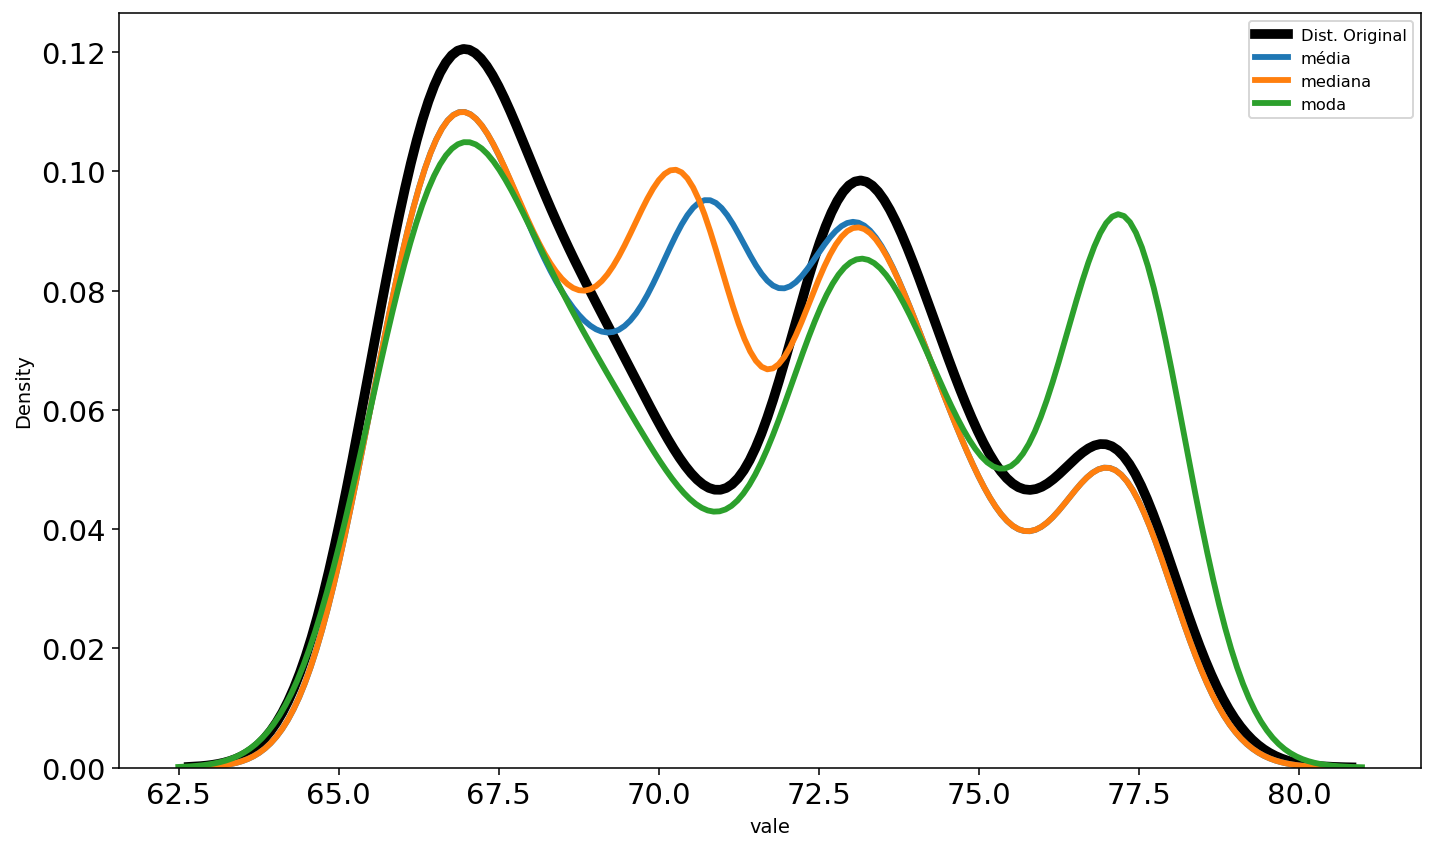

In [ ]:
comparar_distribuicoes(
    clone["vale"],
    {"média": clone["mean"], "mediana": clone["median"], "moda": clone["most_frequent"]},
)


É difícil dizer qual linha se assemelha mais à linha preta, mas vamos ficar com a azul.

In [ ]:
clone.drop(["mean", "median", "most_frequent"], axis=1, inplace=True)

### 2.2 Preenchimento para frente e para trás <small id='2.2'></small>

[Voltar para cima🔝](#toc)

Considere essa pequena amostra de série:

In [1]:
sample = pd.Series([np.nan, 2, 3, np.nan, 4, np.nan, np.nan, 5, 12, np.nan]).to_frame(
    name="original"
)
sample

NameError: name 'pd' is not defined

Vamos usar tanto o preenchimento para frente quanto para trás e atribuí-los de volta ao `DataFrame como colunas separadas:

In [ ]:
sample["para_frente"] = sample["original"].ffill()
sample["para_tras"] = sample["original"].bfill()

sample

,original,para_frente,para_tras
0,NaN,NaN,2.0
1,2.0,2.0,2.0
2,3.0,3.0,3.0
3,NaN,3.0,4.0
4,4.0,4.0,4.0
5,NaN,4.0,5.0
6,NaN,4.0,5.0
7,5.0,5.0,5.0
8,12.0,12.0,12.0
9,NaN,12.0,NaN


Deve ser bastante óbvio como esses métodos funcionam assim que você examinar a saída acima.

Agora, vamos realizar esses métodos no conjunto de dados da qualidade do ar na Índia:

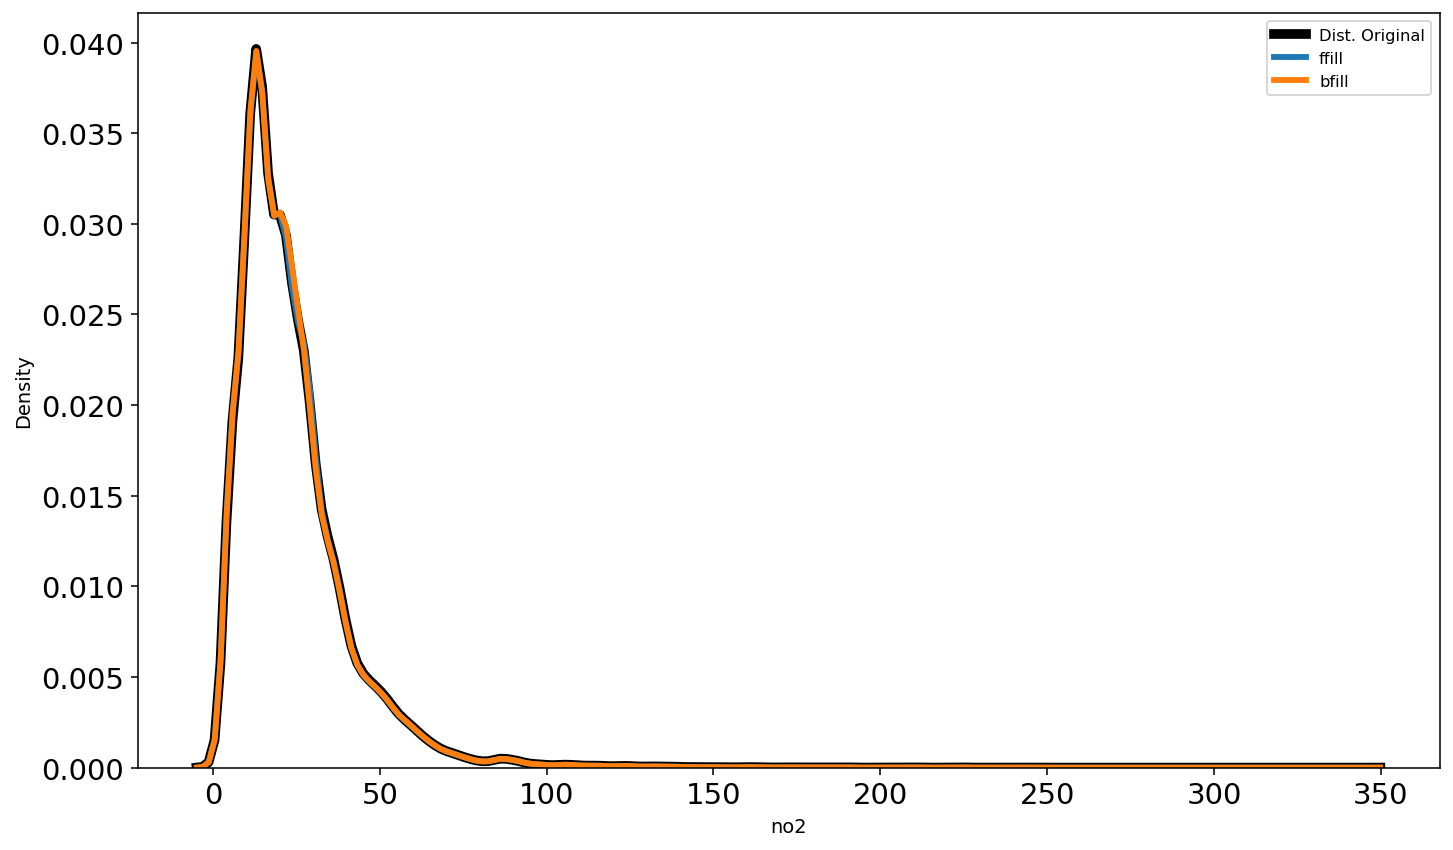

In [ ]:
# Dados de https://towardsdatascience.com/india-air-pollution-data-analysis-bd7dbfe93841
air_q = pd.read_csv(
    "https://raw.githubusercontent.com/ShubhankarRawat/India---Air-Quality-Analysis/master/dataset.csv",
    usecols=["date", "no2"],
    parse_dates=["date"],
    index_col="date",
)
air_q = air_q["2015":"2015"]
for method in ["ffill", "bfill"]:
    air_q[method] = eval(f"air_q['no2'].{method}()")

comparar_distribuicoes(air_q["no2"], {"ffill": air_q["ffill"], "bfill": air_q["bfill"]})

Embora muito básicos, o preenchimento para frente e para trás na verdade funciona muito bem em dados climáticos e de ações, já que as diferenças entre pontos de dados próximos são pequenas.

### 2.3 Usando `pd.interpolate` <small id='2.3'></small>

[Voltar para cima🔝](#toc)

O Pandas oferece um conjunto completo de outras técnicas de imputação estatística na função `pd.interpolate`. Seu parâmetro `method` aceita o nome da técnica como uma string.

As mais populares são 'linear' e 'nearest,' mas você pode ver a lista completa na documentação da função. Aqui, discutiremos apenas essas duas.

Considere esta pequena amostra:

In [ ]:
sample = pd.Series([1] + [np.nan] * 6 + [10]).to_frame(name="original")
sample

,original
0,1.0
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,10.0


Mais uma vez, aplicamos os métodos e atribuímos seus resultados de volta:

In [ ]:
sample["linear"] = sample.original.interpolate(method="linear")
sample["nearest"] = sample.original.interpolate(method="nearest")

sample

,original,linear,nearest
0,1.0,1.000000,1.0
1,NaN,2.285714,1.0
2,NaN,3.571429,1.0
3,NaN,4.857143,1.0
4,NaN,6.142857,10.0
5,NaN,7.428571,10.0
6,NaN,8.714286,10.0
7,10.0,10.000000,10.0


O método linear considera a distância entre quaisquer dois pontos não ausentes como espaçados linearmente e encontra uma linha reta que os conecta (como np.linspace). O método 'nearest' deve ser compreensível pelo seu nome e pela saída acima.

### 2.4 Imputação baseada em modelo com KNN <small id='2.4'></small>

[Voltar para cima🔝](#toc)

O último método que veremos é o algoritmo K-Nearest-Neighbors (KNN). Não vou detalhar como o algoritmo funciona, mas apenas mostrar como você pode usá-lo com o Sklearn.

 [Veja mais detalhes aqui.](https://medium.com/r/?url=https%3A%2F%2Ftowardsdatascience.com%2Fgoing-beyond-the-simpleimputer-for-missing-data-imputation-dd8ba168d505%3Fsource%3Dyour_stories_page-------------------------------------).

O parâmetro mais importante do KNN é k - o número de vizinhos. Vamos aplicar a técnica aos dados da Petrobras/Vale com vários valores de k e encontrar o melhor da mesma forma que fizemos nas seções anteriores:

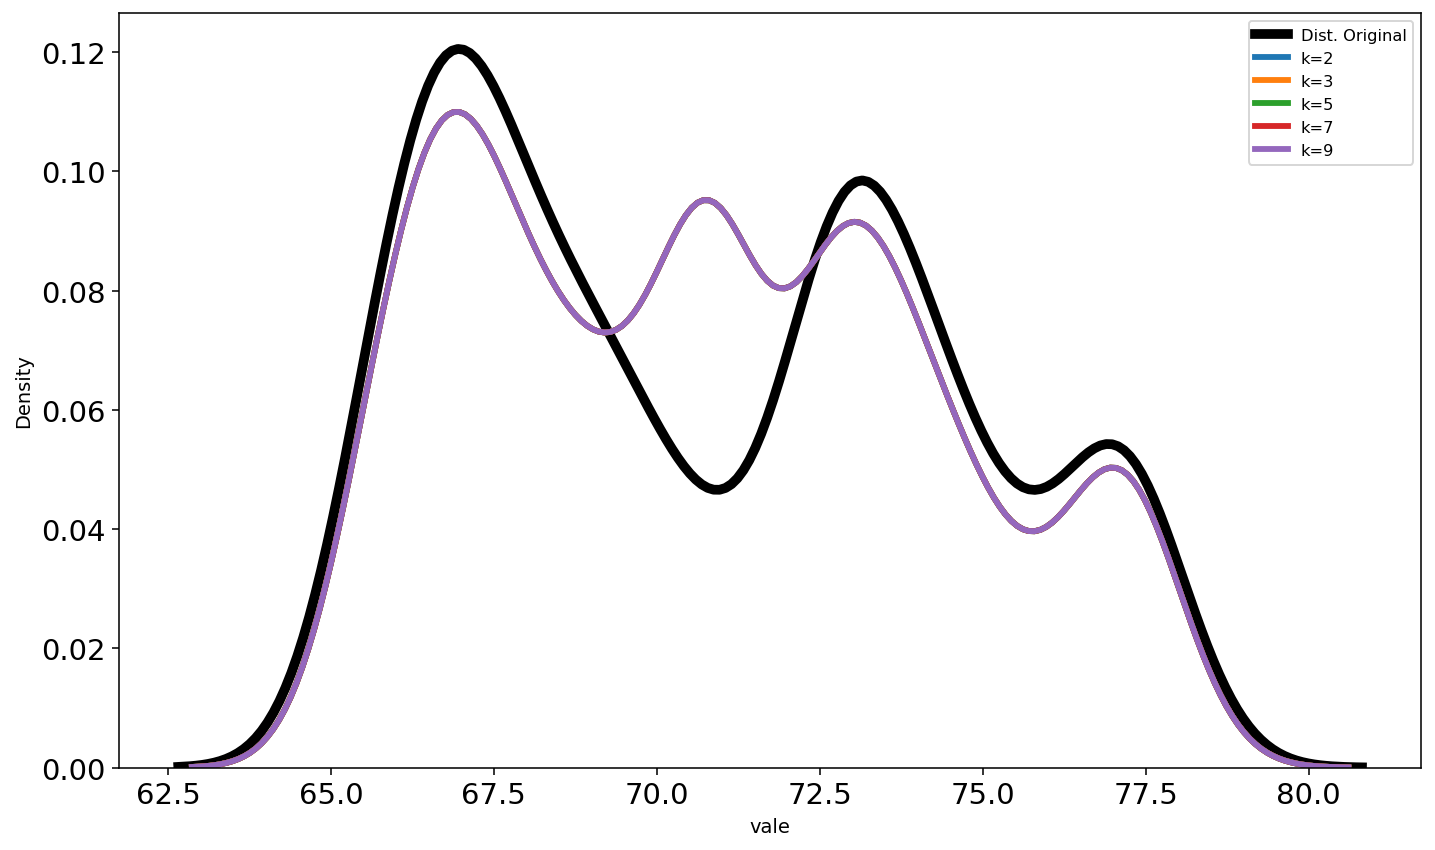

In [ ]:
from sklearn.impute import KNNImputer

n_vizinhos = [2, 3, 5, 7, 9]

for k in n_vizinhos:
    imp = KNNImputer(n_neighbors=k)
    clone[f"k={k}"] = imp.fit_transform(clone["vale"].values.reshape(-1, 1))

comparar_distribuicoes(clone["vale"], {f"k={k}": clone[f"k={k}"] for k in n_vizinhos})


## 3. Cálculos básicos de séries temporais <small id='3'></small>

[Voltar para cima🔝](#toc)

O Pandas oferece funções básicas para calcular os cálculos mais comuns de séries temporais. Estes são chamados de deslocamentos (shifts), atrasos (lags) e algo chamado mudança percentual (percentage change).

### 3.1 Deslocamentos (shifts) e atrasos (lags) <small id='3.1'></small>

[Voltar para cima🔝](#toc)

Uma operação comum em séries temporais é mover todos os pontos de dados um ou mais períodos para trás ou para frente para comparar valores passados e futuros. Você pode fazer essas operações usando a função `shift` do Pandas. Vamos ver como mover os pontos de dados 1 e 2 períodos para o futuro:

In [ ]:
ibov = pd.read_csv("http://www.facom.ufu.br/~albertini/dados/ibov.csv", parse_dates=["Date"], index_col="Date")

ibov.head()


,ibov
Date,
2023-01-03,105497.0
2023-02-03,104912.0
2023-03-03,104440.0
2023-06-03,105171.0
2023-07-03,105179.0


In [ ]:
ibov["shifted_1"] = ibov["ibov"].shift(periods=1)  # o padrão
ibov["shifted_2"] = ibov["ibov"].shift(periods=2)

ibov.head(6)


,ibov,shifted_1,shifted_2
Date,,,
2023-01-03,105497.0,NaN,NaN
2023-02-03,104912.0,105497.0,NaN
2023-03-03,104440.0,104912.0,105497.0
2023-06-03,105171.0,104440.0,104912.0
2023-07-03,105179.0,105171.0,104440.0
2023-08-03,106721.0,105179.0,105171.0


Deslocar para frente permite comparar o ponto de dados atual com aqueles registrados um ou mais períodos antes.

Você também pode deslocar para trás. Esta operação também é chamada de "atraso" (lagging):

In [ ]:
ibov.drop(["shifted_1", "shifted_2"], axis=1, inplace=True)

ibov["lagged_1"] = ibov["ibov"].shift(periods=-1)
ibov["lagged_2"] = ibov["ibov"].shift(periods=-2)

ibov.tail(6)


,ibov,lagged_1,lagged_2
Date,,,
2024-02-23,130624.0,129978.0,131696.0
2024-02-26,129978.0,131696.0,131685.0
2024-02-27,131696.0,131685.0,130155.0
2024-02-28,131685.0,130155.0,129716.0
2024-02-29,130155.0,129716.0,NaN
2024-01-03,129716.0,NaN,NaN


Deslocar para trás nos permite ver a diferença entre o ponto de dados atual e aquele que vem um ou mais períodos depois.

Uma operação comum após deslocar ou atrasar é encontrar a diferença e plotá-la:

In [ ]:
ibov.drop("lagged_2", axis=1, inplace=True)

ibov["diff_lag"] = ibov["lagged_1"] - ibov["ibov"]
ibov.head()


,ibov,lagged_1,diff_lag
Date,,,
2023-01-03,105497.0,104912.0,-585.0
2023-02-03,104912.0,104440.0,-472.0
2023-03-03,104440.0,105171.0,731.0
2023-06-03,105171.0,105179.0,8.0
2023-07-03,105179.0,106721.0,1542.0


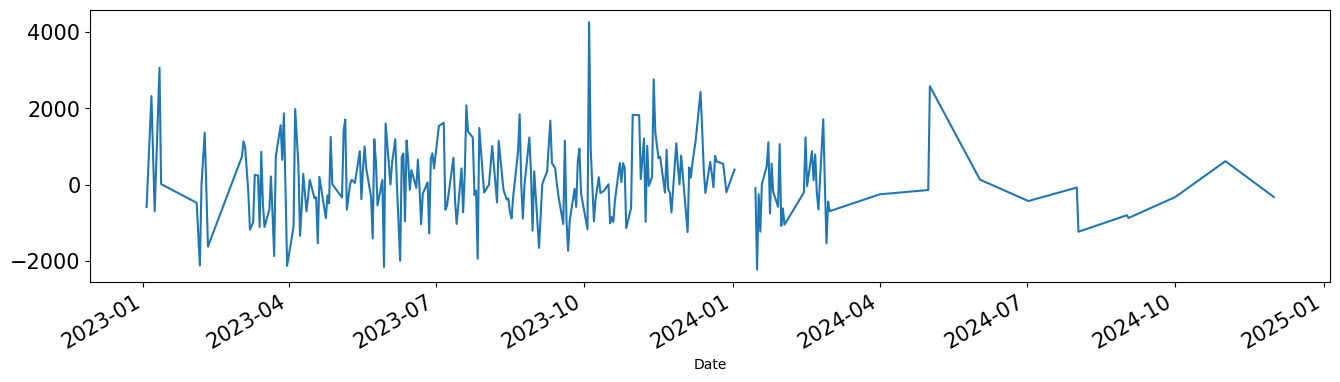

In [ ]:
ibov["diff_lag"].plot(figsize=(16, 4));

Como essa operação é tão comum, o Pandas possui a função `diff` que calcula as diferenças com base no período:

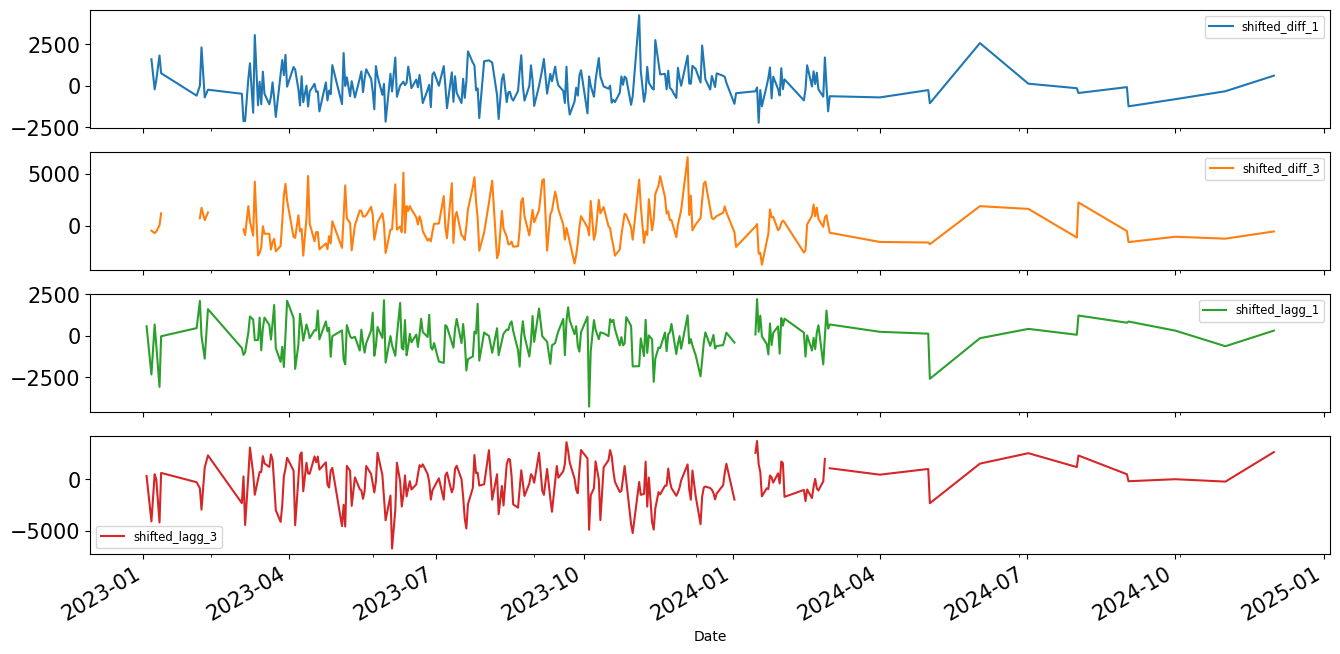

In [ ]:
ibov.drop(["lagged_1", "diff_lag"], axis=1, inplace=True)

ibov["shifted_diff_1"] = ibov["ibov"].diff(periods=1)
ibov["shifted_diff_3"] = ibov["ibov"].diff(periods=3)
ibov["shifted_lagg_1"] = ibov["ibov"].diff(periods=-1)
ibov["shifted_lagg_3"] = ibov["ibov"].diff(periods=-3)

ibov.drop("ibov", axis=1).plot(figsize=(16, 8), subplots=True);


### 3.2 Mudanças percentuais <small id='3.2'></small>

[Voltar para cima🔝](#toc)

Outra métrica comum que pode ser derivada de dados de séries temporais é a variação percentual diária:

In [ ]:
ibov.drop(
    ["shifted_diff_1", "shifted_diff_3", "shifted_lagg_1", "shifted_lagg_3"],
    axis=1,
    inplace=True,
)

In [ ]:
ibov["shifted"] = ibov["ibov"].shift(1)
ibov["change"] = ibov["ibov"].div(ibov["shifted"]).sub(1).mul(100)

ibov.head()


,ibov,shifted,change
Date,,,
2023-01-03,105497.0,NaN,NaN
2023-02-03,104912.0,105497.0,-0.554518
2023-03-03,104440.0,104912.0,-0.449901
2023-06-03,105171.0,104440.0,0.699923
2023-07-03,105179.0,105171.0,0.007607


Para calcular a variação percentual diária, desloque um período para frente e divida a distribuição original pela deslocada e subtraia 1. Os valores resultantes são dados como proporções do que eram no dia anterior.

Como é uma operação comum, o Pandas implementa isso com a função `pct_change`:

In [ ]:
ibov["pct_change"] = ibov["ibov"].pct_change().mul(100)

ibov.head()


,ibov,shifted,change,pct_change
Date,,,,
2023-01-03,105497.0,NaN,NaN,NaN
2023-02-03,104912.0,105497.0,-0.554518,-0.554518
2023-03-03,104440.0,104912.0,-0.449901,-0.449901
2023-06-03,105171.0,104440.0,0.699923,0.699923
2023-07-03,105179.0,105171.0,0.007607,0.007607


In [ ]:
ibov.drop(["shifted", "change", "pct_change"], axis=1, inplace=True)

## 4. Reamostragem (Resampling) <small id='4'></small>

[Voltar para cima🔝](#toc)

Muitas vezes, você pode querer aumentar ou diminuir a granularidade das séries temporais para gerar novos insights. Essas operações são chamadas de reamostragem ou mudança de frequência das séries temporais, e discutiremos as funções do Pandas relacionadas a elas nesta seção.

### 4.1 Mudar a frequência com `asfreq` <small id='4.1'></small>

Os dados de ações do ibov não necessariamente têm uma frequência de data fixa, ou seja, a diferença de período entre cada data não é estritamente sempre a mesma:

In [ ]:
ibov.head()

Vamos corrigir isso atribuindo uma frequência diária (diária):

In [ ]:
ibov.asfreq("D").head(7)

,ibov
Date,
2023-01-03,105497.0
2023-01-04,NaN
2023-01-05,NaN
2023-01-06,110745.0
2023-01-07,NaN
2023-01-08,121945.0
2023-01-09,117991.0


Nós acabamos de tornar a frequência da data no ibov mais granular. Como resultado, novas datas foram adicionadas, levando a mais valores ausentes. Agora você pode interpolar esses valores usando qualquer uma das técnicas que discutimos anteriormente.

Você pode ver a lista de atalhos (aliases) de frequência integrados [aqui](https://medium.com/r/?url=https%3A%2F%2Fpandas.pydata.org%2Fpandas-docs%2Fstable%2Fuser_guide%2Ftimeseries.html%23offset-aliases). Um cenário mais interessante seria usar frequências personalizadas:

In [ ]:
# frequência de 5 horas
ibov.asfreq("5h").head(7)  # Aumenta a série

,ibov
Date,
2023-01-03 00:00:00,105497.0
2023-01-03 05:00:00,NaN
2023-01-03 10:00:00,NaN
2023-01-03 15:00:00,NaN
2023-01-03 20:00:00,NaN
2023-01-04 01:00:00,NaN
2023-01-04 06:00:00,NaN


Também existe uma função `reindex` que opera de forma semelhante e suporta lógica adicional de preenchimento de valores ausentes. Não vamos discuti-la aqui, pois há melhores opções que consideraremos.

### 4.2 Redução de dados por reamostragem (downsampling) com `resample` e agregação <small id='4.2'></small>

[Voltar para cima🔝](#toc)

Em termos de séries temporais, tornar a frequência de um `DateTime` menos granular é chamado de subamostragem (downsampling). Os exemplos são mudar a frequência de horária para diária, de diária para semanal, etc.

Vimos como fazer a subamostragem com `asfreq`. Uma alternativa mais poderosa é `resample`, que se comporta como `pd.groupby`. Assim como `groupby` agrupa os dados com base em valores categóricos, `resample` agrupa os dados por frequências de data.

Vamos fazer a subamostragem dos preços das ações da Petrobras/Vale pela frequência de fim de mês:

In [ ]:
petr_vale.resample("M")

Diferentemente de `asfreq`, usar o `resample` retorna apenas os dados no estado reamostrado. Para ver cada grupo, precisamos usar algum tipo de função, semelhante a como usamos `groupby`.

Como a subamostragem diminui o número de pontos de dados, precisamos de uma função de agregação como média, mediana ou moda:

In [ ]:
petr_vale.resample("M").mean().tail()

,petr,vale
Datetime,,
2023-12-31 00:00:00-03:00,35.538254,74.570218
2024-01-31 00:00:00-03:00,38.591364,71.437029
2024-02-29 00:00:00-03:00,41.971962,66.698942
2024-03-31 00:00:00-03:00,40.617500,66.772143


Também existem funções que retornam o primeiro ou último registro de um grupo:

In [ ]:
# Reamostrar com frequência de mês comercial
# e retornar o primeiro registro de cada grupo
ibov.resample("BM").first().tail()


,ibov
Date,
2024-08-30,132498.0
2024-09-30,132426.0
2024-10-31,131628.0
2024-11-29,131308.0
2024-12-31,131927.0


In [ ]:
# Oposto de first()
ibov.resample("Y").last().tail()  # Frequência de fim de ano


,ibov
Date,
2023-12-31,134392.0
2024-12-31,131927.0


Também é possível usar várias funções de agregação usando `agg`:

In [ ]:
ibov.resample("Y").agg(["mean", "median", "std"]).head()


ibov                       
                     mean    median          std
Date                                            
2023-12-31  115853.836538  117295.5  8149.714894
2024-12-31  130162.452381  129947.0  1685.125503

### 4.3 Reamostragem para cima com `resample` e interpolação <small id='4.3'></small>

[Voltar para cima🔝](#toc)

O oposto de subamostragem é tornar o `DateTime` mais granular. Isso é chamado de reamostragem para cima e inclui operações como mudar a frequência de diária para horária, de horária para segundos, etc.

Quando fazemos a reamostragem para cima, introduzimos novas datas, levando a mais valores ausentes. Isso significa que você precisa usar algum tipo de imputação:

In [ ]:
# Reamostrar com frequência de dia útil e preenchimento para frente
ibov.resample("B").ffill().tail()


,ibov
Date,
2024-11-25,131308.0
2024-11-26,131308.0
2024-11-27,131308.0
2024-11-28,131308.0
2024-11-29,131308.0


In [ ]:
# Reamostrar com frequência de 20 horas e preenchimento para trás
ibov.resample("20h").bfill().sample(5)


,ibov
Date,
2023-01-31 08:00:00,104912.0
2023-09-12 12:00:00,119318.0
2024-07-30 04:00:00,132498.0
2023-06-29 12:00:00,119447.0
2024-09-24 20:00:00,131628.0


### 4.4 Plotando os dados reamostrados <small id='4.4'></small>

[Voltar ao topo🔝](#toc)

A reamostragem não vai dar muito se você não plotar seus resultados.

Na maioria dos casos, você verá novas tendências e padrões quando fizer a subamostragem. Isso ocorre porque a subamostragem reduz a granularidade, eliminando assim o ruído:

In [ ]:
trimestral_petr = petr_vale.resample("Q")["petr"].mean()
anual_petr = petr_vale.resample("Y")["petr"].mean()

trimestral_vale = petr_vale.resample("Q")["vale"].mean()
anual_vale = petr_vale.resample("Y")["vale"].mean()

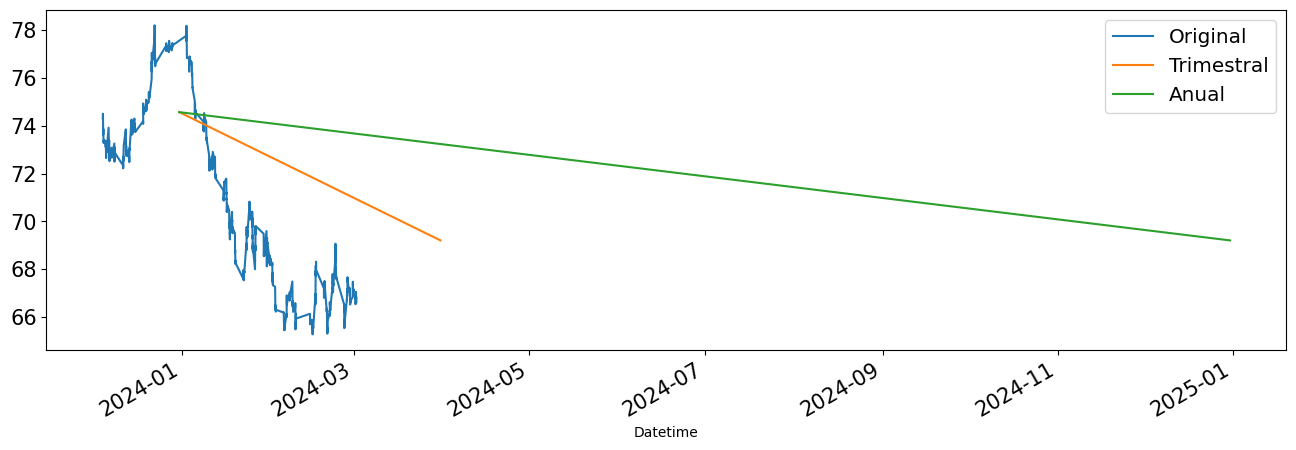

In [ ]:
# Plotar as ações reamostradas da vale
petr_vale["vale"].plot(figsize=(16, 5), label="Original")
trimestral_vale.plot(label="Trimestral")
anual_vale.plot(label="Anual")
plt.legend(fontsize="x-large");


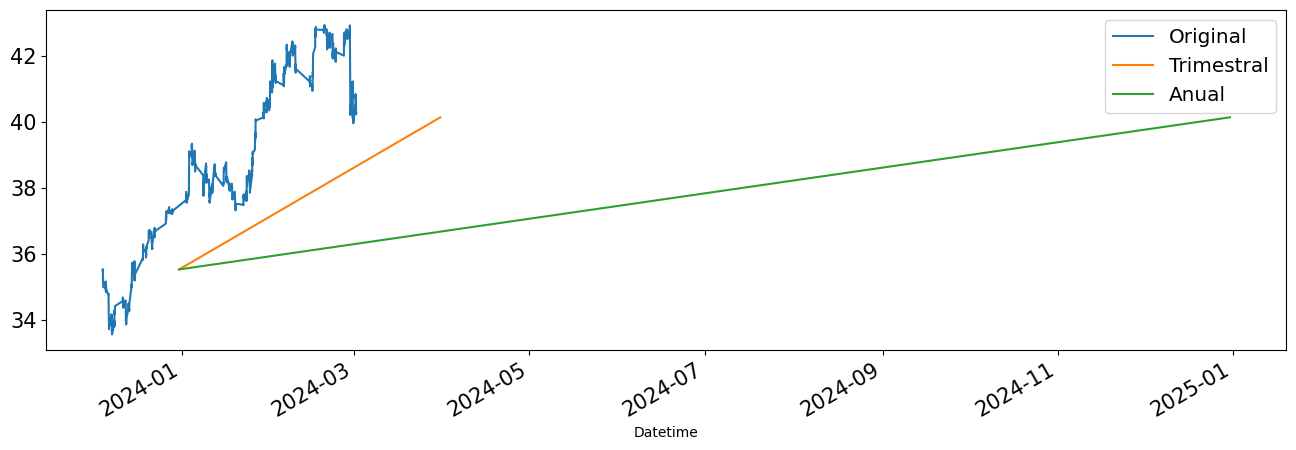

In [ ]:
# Plotar as ações reamostradas da petrobras
petr_vale["petr"].plot(figsize=(16, 5), label="Original")
trimestral_petr.plot(label="Trimestral")
anual_petr.plot(label="Anual")
plt.legend(fontsize="x-large");


Plotar a distribuição reamostrada para cima só vai introduzir mais ruído, então não vamos fazer isso aqui.

## 5. Comparando o crescimento de várias séries temporais <small id='5'></small>

[Voltar ao topo🔝](#toc)

É comum comparar dois ou mais valores numéricos que mudam ao longo do tempo. Por exemplo, podemos querer ver a taxa de crescimento dos preços das ações da Vale e da Petrobras. Mas aqui está o problema:

In [ ]:
petr_vale.mean()

petr    38.756757
vale    70.828339
dtype: float64

Quando os valores de uma série são bem maiores do que da outra, plotar elas juntas provavelmente dificultaria ver detalhes da outra. Em outras palavras, as duas ações têm escalas diferentes.

Para corrigir isso, os estatísticos usam normalização. A variação mais comum é escolher o primeiro valor registrado e dividir o restante das amostras por esse valor. Isso mostra como cada registro muda em comparação com o primeiro.

Aqui está um exemplo

In [ ]:
petr_vale.dropna(inplace=True)

# As primeiras linhas conterão uns porque
# estão sendo divididas por si mesmas
petr_vale.div(petr_vale.iloc[0]).head(10)


,petr,vale
Datetime,,
2023-12-04 10:00:00-03:00,1.000000,1.000000
2023-12-04 10:15:00-03:00,1.000563,1.002153
2023-12-04 10:30:00-03:00,1.000282,1.002019
2023-12-04 10:45:00-03:00,1.001408,1.002692
2023-12-04 11:00:00-03:00,1.001408,1.002153
2023-12-04 11:15:00-03:00,1.000282,1.001615
2023-12-04 11:30:00-03:00,1.001408,1.001211
2023-12-04 11:45:00-03:00,1.000845,0.999327
2023-12-04 12:00:00-03:00,0.993239,0.994482


A saída acima mostra que para as primeiras 3 datas, as ações da Petrobras não mudaram. Depois, aumentou 1% do que era na primeira data ('2010-12-16'). Os preços da Vale são mais voláteis, flutuando entre aumentos de 1 e 2% durante as primeiras 10 datas.

Agora, vamos plotá-los para comparar o crescimento:

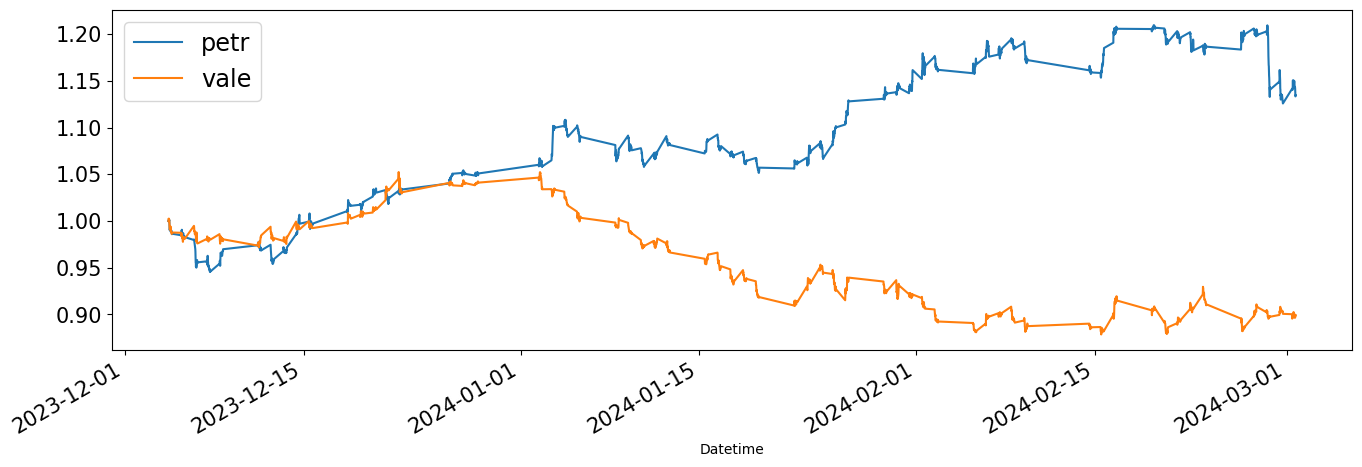

In [ ]:
# Normalizar
normalized_petr_vale = petr_vale.div(petr_vale.iloc[0])

normalized_petr_vale.plot(figsize=(16, 5))
plt.legend(fontsize="xx-large");

Tanto a Vale quanto a Petrobra se destacam na bolsa. Esse gráfico pode ser mais interessante quando compararmos com o índice Bovespa.

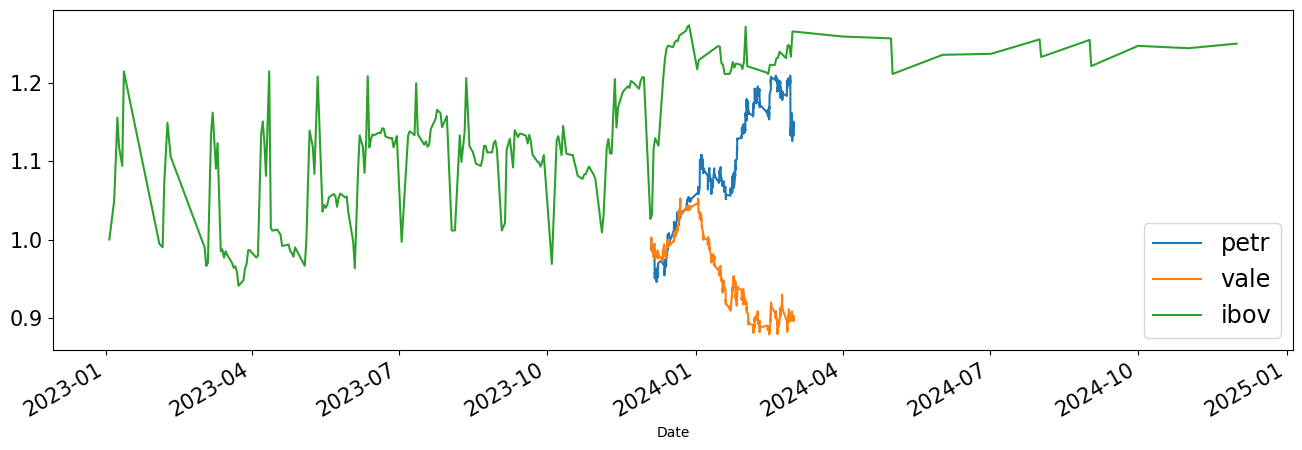

In [ ]:
# Normalize Ibov
normalized_ibov = ibov.div(ibov.iloc[0])

# PLot
fig, ax = plt.subplots(figsize=(16, 5))

normalized_petr_vale.plot(ax=ax)
normalized_ibov["2011":].plot(label="Ibovespa", ax=ax)

plt.legend(fontsize="xx-large");

## 6. Funções de janela <small id='6'></small>

[Voltar para cima🔝](#toc)

Existe um outro tipo de função que ajuda a analizar séries de outras formas. O tipo em questão é chamado de função de janela. Ela ajuda a agregar um dado número de linhas de diferentes `timestamps`.


### 6.1 Funções de janela deslizante<small id='6.1'></small>

[Voltar para cima🔝](#toc)

Funções de janela deslizante vão manter o mesmo comprimento conforme ela são aplicadas ao longo da série.
Aqui está um exemplo de janela de 5 períodos ao longo de dados:

![](https://cdn-images-1.medium.com/max/800/1*AsTSxTsolMRce59M3dw-KA.png)

Aqui está como criar janelas deslizantes em `pandas`:

In [ ]:
petr_vale.rolling(window=5)

Rolling [window=5,center=False,axis=0,method=single]

Assim como `resample`, devemos encadear alguma função para analisar a janela. Por exemplo, vamos criar uma soma cumulativa para os últimos 5 períodos:

In [ ]:
petr_vale["vale_5d_roll"] = petr_vale["vale"].rolling(window=5).sum()

petr_vale.head(10)

,petr,vale,vale_5d_roll
Datetime,,,
2023-12-04 10:00:00-03:00,35.500000,74.300003,NaN
2023-12-04 10:15:00-03:00,35.520000,74.459999,NaN
2023-12-04 10:30:00-03:00,35.509998,74.449997,NaN
2023-12-04 10:45:00-03:00,35.549999,74.500000,NaN
2023-12-04 11:00:00-03:00,35.549999,74.459999,372.169998
2023-12-04 11:15:00-03:00,35.509998,74.419998,372.289993
2023-12-04 11:30:00-03:00,35.549999,74.389999,372.219994
2023-12-04 11:45:00-03:00,35.529999,74.250000,372.019997
2023-12-04 12:00:00-03:00,35.259998,73.889999,371.409996


As primeiras 4 linhas serão NaN porque não tem 4 períodos anteriores para compor a soma. Qualquer outra linha conterá a soma das 4 linhas anteriores à atual e a atual.

Atente-se ao argumento da janela. Se você passar um inteiro, o tamanho da janela será determinado por aquele número de linhas. Se você passar um alias de frequência tal como meses ou anos, o tamanho da janela será aquele número de linhas que inclui a unidade da frequência passada. Em outras palavras, uma janela de período de 5 anos poderá ter um tamanho diferente de uma janela de período de 5 dias.

Por exemplo, plotamos médias móveis de 90 e 360 dias para as ações da Petrobrás:

In [ ]:
petr_vale["90D_roll_mean"] = petr_vale["petr"].rolling(window="90D").mean()
petr_vale["360D_roll_mean"] = petr_vale["petr"].rolling(window="360D").mean()

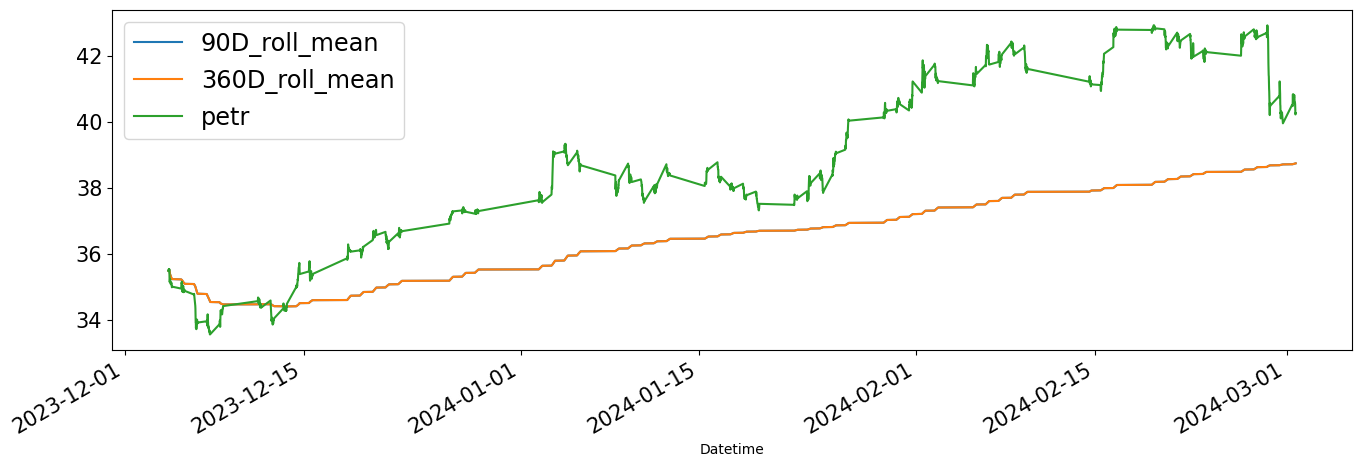

In [ ]:
fig, ax = plt.subplots(figsize=(16, 5))

petr_vale[["90D_roll_mean", "360D_roll_mean", "petr"]].plot(ax=ax)

plt.legend(fontsize="xx-large");

Assim como com `groupby` e `resample`, você pode calcular várias métrica com uma função de agregação para cada janela.

### 6.2 Funções de janela expansoras <small id='6.2'></small>

[Voltar para cima🔝](#toc)

Outro tipo de função de janela trabalha com janelas expansoras. Cada nova janela conterá todos os registros até o momento atual:

![](https://cdn-images-1.medium.com/max/800/1*lqNZULHaEUHJDcaevMz1cA.png)

Janelas expansoras são úteis para calcular métricas 'contínuas' por exemplo  `sum`, `mean`, `min`, `max` e `taxa de retorno` etc.

A seguir você verá como calcular a soma cumulativa.
A soma cumulativa é na verdade uma função de janela expansora com tamanho de janela 1:

In [ ]:
petr_vale.drop(
    ["vale_5d_roll", "90D_roll_mean", "360D_roll_mean"], axis=1, inplace=True
)

In [ ]:
petr_vale["expanding_cumsum"] = petr_vale["petr"].expanding(min_periods=1).sum()

petr_vale["cumsum_function"] = petr_vale["petr"].cumsum()

petr_vale.head()

A função `expanding` tem um parâmetro `min_periods` que determina o tamanho inicial de janela.

Agora plotamos o min e max no Ibovespa:

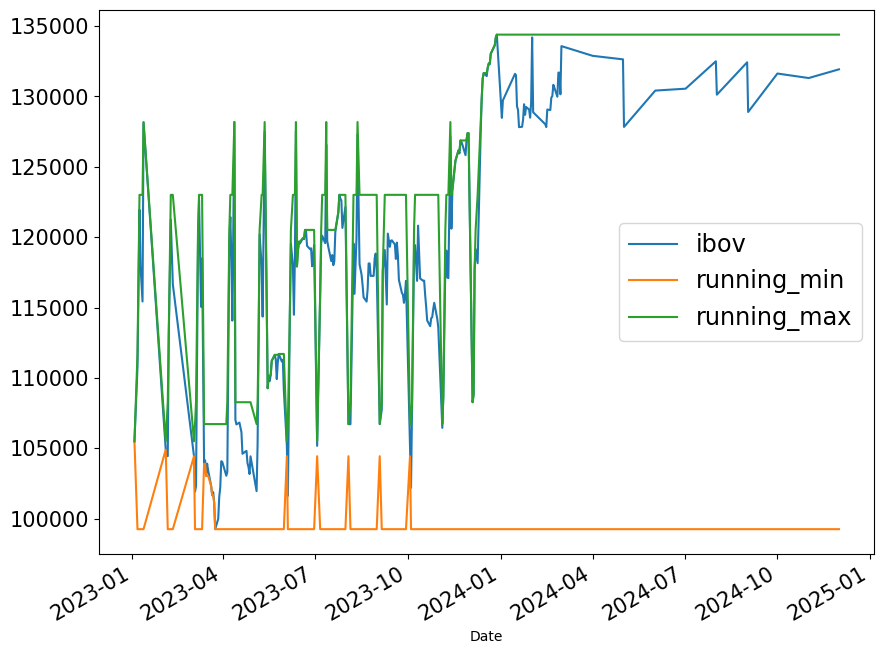

In [ ]:
ibov["running_min"] = ibov["ibov"].expanding().min()  # similar cummin()
ibov["running_max"] = ibov["ibov"].expanding().max()

fig, ax = plt.subplots(figsize=(10, 8))

ibov.plot(ax=ax)
plt.legend(fontsize="xx-large");

## Conclusão <small id='7'></small>

[Voltar para cima🔝](#toc)

Percorremos as principais função do `pandas` para manipular séries temporais. Certamente, a análise de séries temporais de muitos tipos de aplicações pode ser construída a partir dessas operações básicas.
